### **Atividade Somativa Parte 2**
* **Acadêmica:** Francine Estefanela Moura
* **Disciplina:** IA Aplicada à Saúde
* **Dataset:** mental_disorders_reddit.csv
* **Objetivo do Projeto:** Desenvolver um modelo de Machine Learning que analisa postagens de fóruns online sobre saúde mental e identifique potenciais sinais de risco de suicídio, com o intuito de auxiliar na prevenção e intervenção precoce.

### **Sobre o projeto** 

A crescente popularidade de fóruns online como o Reddit, trouxe consigo um desafio crucial: a identificação de indivíduos em risco de suicídio.  Embora esses espaços virtuais sejam valiosos para conectar pessoas e compartilhar experiências, o volume de informações e a complexidade da linguagem humana dificultam a detecção de sinais de alerta em meio a tantas mensagens.  A identificação manual de postagens com conteúdo que sugira ideação suicida ou autoagressão é uma tarefa árdua, especialmente para moderadores e profissionais de saúde mental.

Pessoalmente, testemunhei o impacto devastador do suicídio em minha própria família, o que me impulsionou a buscar soluções para este problema.  Este projeto, portanto,  nasce da necessidade urgente de criar uma ferramenta que automatize a identificação de indivíduos em risco nesses fóruns, permitindo intervenções mais rápidas e eficazes. Acredito que, ao auxiliar na triagem e análise de postagens, podemos contribuir para a prevenção e oferecer suporte a quem mais precisa.

### **Tecnologias adotadas:**
Para organizar este projeto, utilizei um guia passo-a-passo chamado CRISP-DM, que é muito usado em projetos de ciência de dados. Ele me ajudou a seguir todas as etapas importantes, desde entender o problema até analisar os resultados.

Também usei técnicas de Processamento de Linguagem Natural (PLN) para analisar as postagens. Imagine que o computador precisa entender a linguagem humana! Para isso, "quebrei" o texto em palavras, eliminei palavras comuns que não carregam muito significado e agrupei palavras com o mesmo sentido. Depois, transformei as palavras em números para que o modelo de Machine Learning pudesse entendê-las.

Para classificar as postagens, utilizei um modelo chamado Regressão Logística. Ele é como um "aprendiz" que analisa as postagens e tenta classificá-las em diferentes categorias de transtornos mentais.

Para facilitar o trabalho, usei algumas ferramentas:
* **NLTK:** para "limpar" e organizar o texto das postagens.
* **Scikit-learn:** para treinar e testar o modelo de Machine Learning.
* **Pandas:** para analisar e manipular os dados.
* **Matplotlib e Seaborn:** para criar gráficos e visualizar os resultados.

Com todas essas ferramentas e técnicas, consegui analisar as postagens do Reddit e construir um modelo que pode ajudar a identificar pessoas que precisam de ajuda. 

### **Sobre o dataset:**
O dataset `mental_disorders_reddit.csv` contém informações sobre postagens do Reddit relacionadas à saúde mental, incluindo: título da postagem,  corpo do texto, data de criação, classificação NSFW (conteúdo impróprio) e subreddit (comunidade).

Para o desenvolvimento do projeto, serão utilizados o título, o corpo do texto e o subreddit de cada postagem, além dos timestamps para identificar padrões temporais que possam indicar risco aumentado.

O dataset foi obtido do Kaggle: `https://www.kaggle.com/datasets/kamaruladha/mental-disorders-identification-reddit-nlp?resource=download`.

O dataset é útil para diversas tarefas, como classificação de texto (identificar postagens com e sem tom negativo), análise de sentimento e detecção de padrões linguísticos associados ao comportamento. Também pode ser usado para  pesquisas sobre saúde mental e para entender como as pessoas se comunicam online sobre seus desafios emocionais.

## **1. Importando Bibliotecas e carregando Dataset**

In [26]:
# Importando bibliotecas para manipulação e análise de dados
import pandas as pd      
import numpy as np        

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt 
import seaborn as sns    

# Importando bibliotecas para processamento de linguagem natural
from textblob import TextBlob 

# Importando bibliotecas para machine learning
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression  

# Importando bibliotecas para avaliação do modelo
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score, confusion_matrix 

* ### **Carregando Dataset:** 
O dataset `mental_disorders_reddit.csv` contém postagens do Reddit, com informações como título, conteúdo, data de criação, classificação NSFW e subreddit, permitindo análise de sentimentos e padrões em discussões sobre saúde mental.

In [2]:
# Carregando o dataset
data = pd.read_csv('C:/Users/frant/Desktop/IA-Saude/Somativa2/mental_disorders_reddit.csv')

# Exibe as primeiras linhas
data.head()  

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


* ### **Pré-processamento dos dados**
Esta etapa consiste em limpar os dados, removendo ou preenchendo valores nulos e filtrando postagens irrelevantes para a análise.

In [5]:
# Removendo valores nulos 
data = data.dropna(subset=['selftext'])  # Remove postagens sem conteúdo de texto

# Filtrando postagens que contenham conteúdo adequado para análise
data = data[data['over_18'] == False]  # Filtra postagens seguras (não NSFW)

## **3. Análise Exploratória**

In [6]:
# Verificando informações básicas
data.info()     # Mostra o tipo de dado em cada coluna e se há valores nulos
data.describe() # Estatísticas básicas para colunas numéricas
data.isnull().sum()  # Quantidade de valores nulos em cada coluna

<class 'pandas.core.frame.DataFrame'>
Index: 649739 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        649699 non-null  object
 1   selftext     649739 non-null  object
 2   created_utc  649739 non-null  int64 
 3   over_18      649739 non-null  bool  
 4   subreddit    649739 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 25.4+ MB


title          40
selftext        0
created_utc     0
over_18         0
subreddit       0
dtype: int64

**Análise:** A análise inicial dos dados indica que o dataset possui **701.787 postagens**, com pequenas lacunas nos títulos e conteúdos, mas dados completos sobre a data de criação, classificação NSFW e subreddit, o que possibilita uma análise robusta sobre as discussões de saúde mental.
* *NSFW significa "Não Seguro Para o Trabalho", referindo-se a conteúdos inadequados ou ofensivos para ambientes profissionais.*

## **5. Análise exploratória**

* ### **Distribuição dos posts por Subreddit**

Gráfico de barras para mostrar como as postagens estão distribuídas pelos diferentes subreddits (comunidades ou fóruns dentro do Reddit dedicadas a temas específicos).

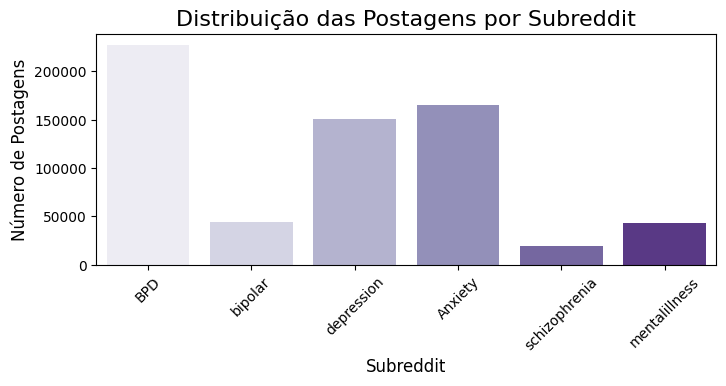

In [7]:
# Configuração para o gráfico de distribuição dos subreddits
plt.figure(figsize=(8, 3))
sns.countplot(data=data, x='subreddit', hue='subreddit', palette='Purples', legend=False)
plt.title('Distribuição das Postagens por Subreddit', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Número de Postagens', fontsize=12)
plt.show()

**Análise:** O gráfico mostra que BPD (Transtorno de Personalidade Borderline) é o tema com o maior número de postagens, seguido por ansiedade e depressão, que estão próximos em quantidade. Já bipolaridade, outras doenças mentais e esquizofrenia têm números mais baixos, com esquizofrenia registrando o menor valor.

* ### **Proporção de posts nos Subreddits de Saúde Mental**

Proporção de menções de saúde mental nos subreddits mais ativos.

In [8]:
# Subreddits mais comuns
subreddit_counts = data['subreddit'].value_counts()

# Criando as colunas 'depression', 'anxiety' e 'borderline'
keywords = ['depression', 'anxiety', 'borderline']
for keyword in keywords:
    data[keyword] = data['selftext'].str.contains(keyword, case=False, na=False)

# Verificando a proporção de posts com palavras-chave de saúde mental nos subreddits
health_mental_subreddits = data[data['depression'] | data['anxiety'] | data['borderline']]['subreddit'].value_counts()

# Comparando os subreddits mais ativos com posts de saúde mental
health_mental_subreddit_proportion = health_mental_subreddits / subreddit_counts
print(health_mental_subreddit_proportion)

subreddit
Anxiety          0.577143
BPD              0.139227
bipolar          0.153622
depression       0.223587
mentalillness    0.253792
schizophrenia    0.049708
Name: count, dtype: float64


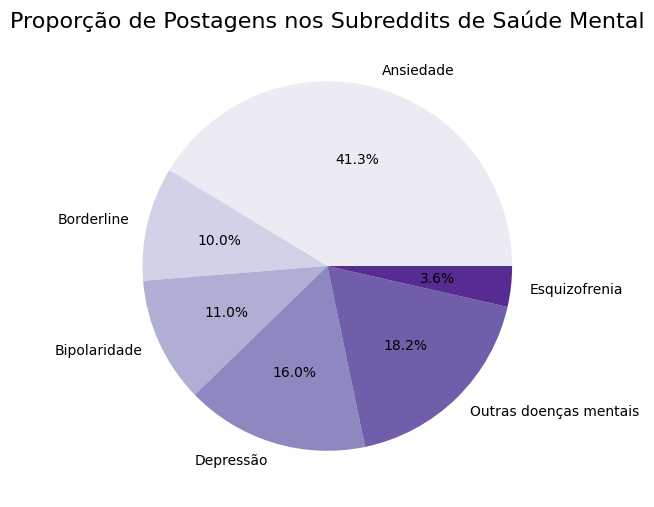

In [9]:
# Dados para o gráfico de proporções
proporcao_posts = {
    'Ansiedade': 0.577143,
    'Borderline': 0.139227,
    'Bipolaridade': 0.153622,
    'Depressão': 0.223587,
    'Outras doenças mentais': 0.253792,
    'Esquizofrenia': 0.049708
}

# Criando gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(proporcao_posts.values(), labels=proporcao_posts.keys(), autopct='%1.1f%%', colors=sns.color_palette("Purples", len(proporcao_posts)))
plt.title('Proporção de Postagens nos Subreddits de Saúde Mental', fontsize=16)
plt.show()


**Análise:** O gráfico mostra que a ansiedade é o transtorno mental mais discutido nos subreddits, representando 41,3% das postagens, seguida por outras doenças mentais (18,2%) e depressão (16%).

* ### **Comparando os transtornos mentais mais comentados**

Este gráfico analisa a frequência de menções a distúrbios mentais em diferentes subreddits, temas que já observamos em gráficos anteriores, permitindo comparar como são discutidos nas diversas comunidades do Reddit.

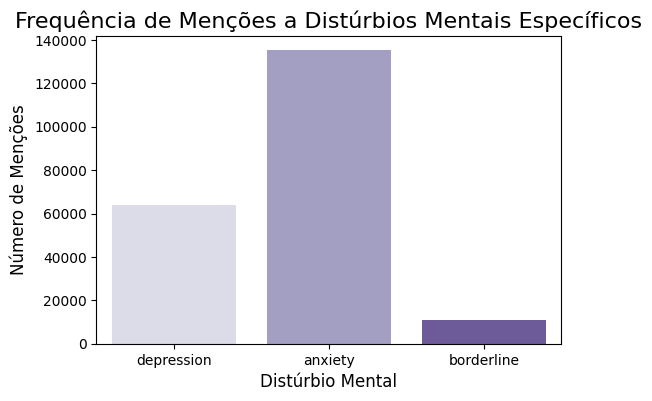

In [10]:
# Contando as ocorrências das palavras 'depression', 'anxiety', 'borderline' nos textos
keywords = ['depression', 'anxiety', 'borderline']

# Criando uma coluna para cada palavra-chave e verificando a presença
for keyword in keywords:
    # Verifica se a palavra aparece nos textos e cria uma coluna para cada palavra-chave
    data[keyword] = data['selftext'].str.contains(keyword, case=False, na=False)

# Contando a frequência de cada palavra-chave
keyword_counts = data[keywords].sum()

# Gerando gráfico com as contagens
plt.figure(figsize=(6, 4))

# Aqui estamos atribuindo 'x' à 'hue' para evitar o aviso de depreciação
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, hue=keyword_counts.index, palette='Purples', legend=False)

plt.title('Frequência de Menções a Distúrbios Mentais Específicos', fontsize=16)
plt.xlabel('Distúrbio Mental', fontsize=12)
plt.ylabel('Número de Menções', fontsize=12)
plt.show()


**Análise:** O gráfico de menções podemos confirmar que a ansiedade é o transtorno mais mencionado em todos os subreddits analisados. Isso reforça a ideia de que a ansiedade é um tema central nas discussões sobre saúde mental online, e que ela pode estar presente em pessoas com diferentes transtornos, incluindo o Transtorno de Personalidade Borderline (BPD).

**Análise final dos Gráficos sobre Posts:** 

A análise conjunta dos gráficos revela que, apesar do subreddit "BPD" ter o maior número de postagens, a ansiedade é o transtorno mais discutido, sugerindo sua alta prevalência entre pessoas com BPD.  Isso reforça a ideia de que a ansiedade é um problema de saúde mental frequente e comumente associado a outros transtornos.  Pessoas com BPD podem vivenciar altos níveis de ansiedade, o que explica a alta frequência de menções a esse transtorno no subreddit "BPD".  Embora esta análise seja baseada em um único dataset,  ela  fornece insights importantes sobre a relação entre ansiedade e outros transtornos mentais, como o BPD.

* ### **Estatísticas Descritivas dos dados**

Nesta etapa vamos calcular algumas métricas básicas, como a média, mediana, desvio padrão e quantis para o comprimento das postagens (tamanho dos textos). Isso ajuda a entender melhor a distribuição e variabilidade dos textos.

In [11]:
# Estatísticas descritivas do tamanho dos textos
text_length_stats = data['selftext'].str.len().describe()
print(text_length_stats)

count    649739.000000
mean        790.595867
std        1013.005608
min           1.000000
25%         202.000000
50%         527.000000
75%        1029.000000
max       33565.000000
Name: selftext, dtype: float64


**Análise:** As estatísticas descritivas mostram que **50% das postagens têm até 527 caracteres** e que a **média de caracteres por postagem é de 790,6**. Isso sugere que a maioria das postagens são curtas, com um número menor de postagens mais longas.

* ### **Distribuição do tamanho dos textos nos posts**

Aqui, queremos ver a distribuição dos tamanhos dos textos, ou seja, o número de palavras ou caracteres em cada postagem para análise. 

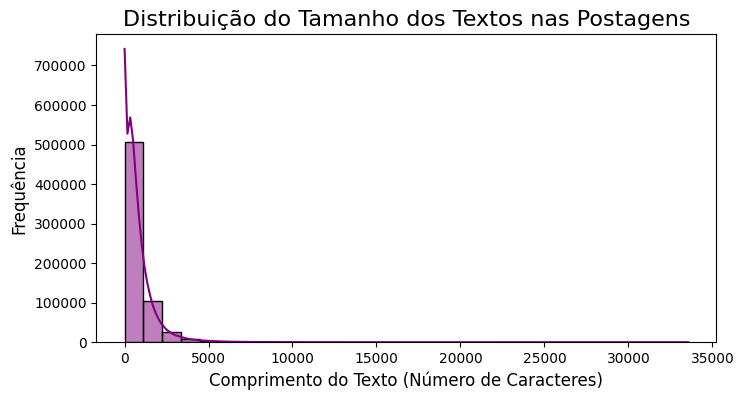

In [14]:
# Calculando o comprimento dos textos nas postagens
data['text_length'] = data['selftext'].apply(len)

# Gráfico de distribuição do comprimento dos textos
plt.figure(figsize=(8, 4))
sns.histplot(data['text_length'], bins=30, kde=True, color='purple')
plt.title('Distribuição do Tamanho dos Textos nas Postagens', fontsize=16)
plt.xlabel('Comprimento do Texto (Número de Caracteres)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

**Análise:** O gráfico mostra que a maioria das postagens tem textos curtos, com **menos de 5.000 caracteres**, e a frequência diminui conforme o tamanho do texto aumenta.

* ### **Distribuição de Comprimento do Texto por Subreddit**

Vamos analisar a variação no comprimento das postagens entre os diferentes subreddits utilizando um boxplot.

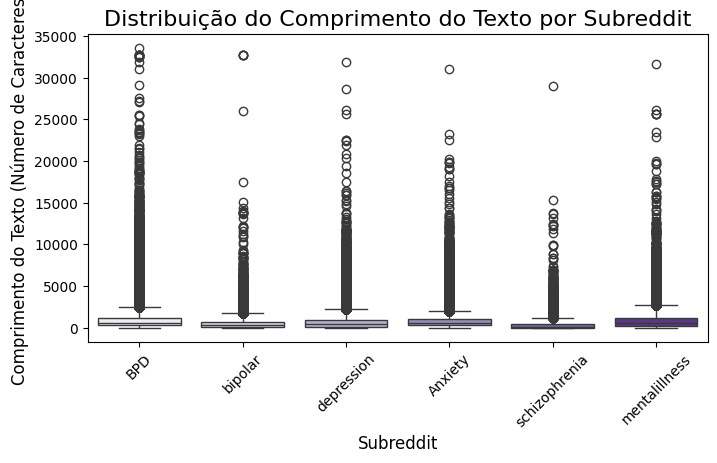

In [15]:
# Boxplot para verificar a distribuição do comprimento do texto por subreddit
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='subreddit', y='text_length', hue='subreddit', palette='Purples')
plt.title('Distribuição do Comprimento do Texto por Subreddit', fontsize=16)
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Comprimento do Texto (Número de Caracteres)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Análise:** O gráfico mostra que as postagens no subreddit "BPD" tendem a ter maior variação no tamanho dos textos, enquanto as postagens em "schizophrenia" são geralmente mais curtas.

* ### **Análisando a proporção de posts com e sem texto**

Algumas postagens podem não conter texto ou ser compostas apenas por títulos, e isso será visualizado em um gráfico de barras. Antes de gerar o gráfico, vou verificar a validade dos textos na coluna `selftext`, o cálculo correto da coluna `has_text` e a quantidade de postagens com ou sem texto.

In [16]:
# Criando a coluna 'has_text'
data['has_text'] = data['selftext'].apply(lambda x: 0 if pd.isna(x) or len(x.strip()) == 0 else 1)

# Verificando as primeiras linhas da coluna 'selftext' para conferir se está correta
print(data[['title', 'selftext', 'has_text']].head())

# Checando se existem valores nulos em 'selftext' e 'has_text'
print(data[['selftext', 'has_text']].isnull().sum())

# Contagem das postagens com e sem texto (verificando se a contagem está correta)
print(data['has_text'].value_counts())

                                 title  \
0  Life is so pointless without others   
1                           Cold rage?   
2                I don’t know who I am   
3              HELP! Opinions! Advice!   
4                                 help   

                                            selftext  has_text  
0  Does anyone else think the most important part...         1  
1  Hello fellow friends 😄\n\nI'm on the BPD spect...         1  
2  My [F20] bf [M20] told me today (after I said ...         1  
3  Okay, I’m about to open up about many things I...         1  
4                                          [removed]         1  
selftext    0
has_text    0
dtype: int64
has_text
1    649716
0        23
Name: count, dtype: int64


**Análise:** Com os dados apresentados podemos concluir que a grande maioria das postagens analisadas (649.716) contém texto na coluna `selftext`, enquanto apenas uma pequena parte (23) não possui texto. Isso indica que a coluna `has_text` foi calculada corretamente e que o dataset é consistente em relação à presença de conteúdo textual nas postagens.
Essa informação é importante para a análise dos dados, pois garante que a maioria das postagens possui conteúdo textual que pode ser utilizado para extrair informações relevantes sobre os transtornos mentais e o risco de suicídio, que é o foco do seu projeto.

* ### **Correlação entre o Tamanho do Texto e Transtornos**

A correlação entre o tamanho do texto e a presença de transtornos mentais.

In [17]:
# Adicionando comprimento do texto
data['text_length'] = data['selftext'].str.len()

# Analisando a correlação entre comprimento do texto e transtornos mentais
correlation = data[['text_length'] + keywords].corr()
print(correlation)

             text_length  depression   anxiety  borderline
text_length     1.000000    0.219139  0.193191    0.129614
depression      0.219139    1.000000  0.183358    0.034588
anxiety         0.193191    0.183358  1.000000   -0.004010
borderline      0.129614    0.034588 -0.004010    1.000000


**Análise:** A análise de correlação entre o tamanho das postagens e a presença de transtornos mentais mostra que há uma correlação fraca entre o comprimento do texto e a presença de depressão (0.22) e ansiedade (0.19), sugerindo que postagens sobre esses transtornos tendem a ser um pouco mais longas. A correlação com borderline (0.13) é ainda mais fraca, e a relação entre ansiedade e borderline (-0.004) é praticamente inexistente, indicando que o tamanho do texto não está fortemente ligado a esses transtornos.

* ### **Visualização de Sentimentos**

Distribuição de sentimentos para identificar posts mais negativos, possivelmente relacionados a sinais de transtornos mentais.

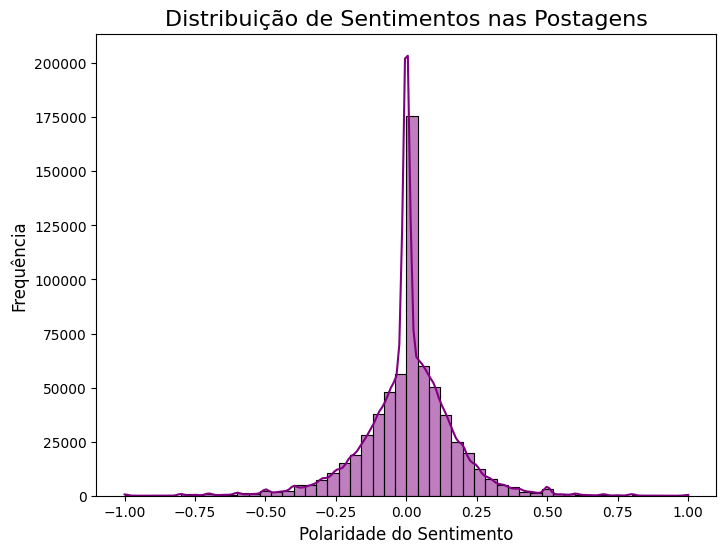

In [18]:
# Função para calcular o sentimento
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aplicando a função nos textos
data['sentiment'] = data['selftext'].apply(get_sentiment)

# Histograma do sentimento
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment'], bins=50, kde=True, color='purple')
plt.title('Distribuição de Sentimentos nas Postagens', fontsize=16)
plt.xlabel('Polaridade do Sentimento', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

**Análise:** O gráfico indica que a maioria das postagens expressa sentimentos neutros, com um aumento gradual de postagens com sentimentos positivos e negativos conforme se afastam da neutralidade.

## **4. Treinando Modelo de ML**

O código abaixo prepara os dados e treina um modelo de Regressão Logística para classificar as postagens do Reddit em diferentes categorias de transtornos mentais, como ansiedade e depressão.

In [ ]:
# Separando as features e o target
X = data['selftext']  
y = data['subreddit']  

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorizando o texto com TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Treinando um modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_vec, y_train)

## **5. Predição do Modelo**

In [20]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_vec)

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

      Anxiety       0.80      0.81      0.81     32949
          BPD       0.78      0.77      0.78     45434
      bipolar       0.75      0.42      0.54      8758
   depression       0.57      0.80      0.67     30242
mentalillness       0.53      0.20      0.29      8605
schizophrenia       0.66      0.21      0.32      3960

     accuracy                           0.71    129948
    macro avg       0.68      0.54      0.57    129948
 weighted avg       0.72      0.71      0.70    129948



**Explicabilidade:** Usei o modelo para prever a qual subreddit novas postagens pertencem.  Também analisamos os "pesos" que ele dá para cada palavra,  para entender como ele decide.
Por exemplo, se uma postagem tem palavras como "ansioso", o modelo provavelmente a classificará como "Ansiedade". Se tem palavras como "triste",  provavelmente a classificará como "Depressão".

Essa análise nos ajuda a entender como o modelo funciona, mas como ele usa muitas palavras, pode ser difícil analisar cada uma.

### **6. Avaliação do modelo**
Os resultados da avaliação (acurácia, precisão, recall, F1-score e matriz de confusão) devem ser analisados para determinar a performance do modelo.

In [ ]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Imprimindo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão:\n{cm}')

Acurácia do modelo: 0.7100147751408256
Matriz de confusão:
[[26610  2523   166  3240   349    61]
 [ 2159 35189   426  7211   380    69]
 [  670  1414  3700  2681   184   109]
 [ 1959  3500   215 24179   366    23]
 [ 1393  2115   282  2905  1750   160]
 [  343   422   174  1930   254   837]]


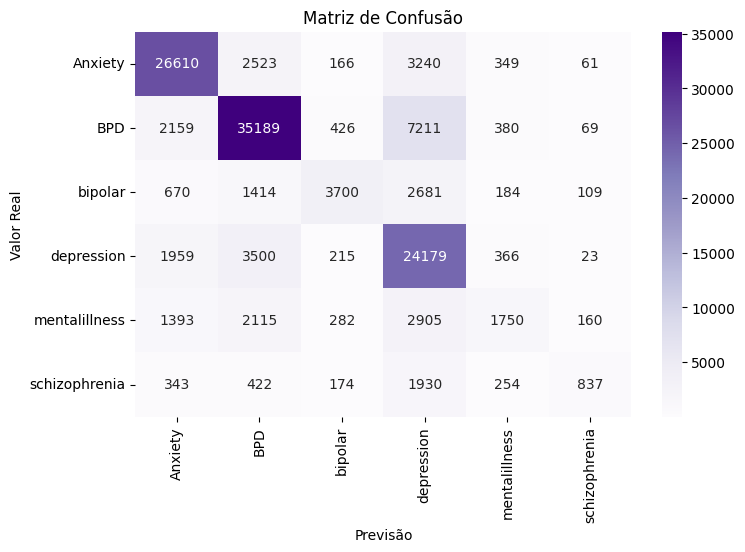

In [24]:
# Criando o heatmap da matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

**Análise:** O modelo teve bom desempenho na classificação de "Ansiedade" e "BPD", mas precisa ser aprimorado para categorias com menos dados, como "mentalillness" e "schizophrenia".

### **7. Conclusão**

Neste projeto busquei desenvolver um sistema para classificar postagens do Reddit sobre transtornos mentais, utilizando técnicas de PLN e Machine Learning. Analisei um conjunto de dados com postagens de seis subreddits: "Ansiedade", "Transtorno de Personalidade Borderline", "Transtorno Bipolar", "Depressão", "Doenças Mentais" e "Esquizofrenia".

Minha análise dos dados revelou que a **ansiedade** é um tema frequente em diferentes transtornos e que a maioria das postagens tem textos curtos e expressa sentimentos neutros. Utilizei um modelo de **Regressão Logística** para classificar as postagens, obtendo **71% de acurácia**. As categorias "Ansiedade" e "Transtorno de Personalidade Borderline" apresentaram o melhor desempenho, enquanto "Doenças Mentais" e "Esquizofrenia" tiveram resultados inferiores.

Para aprimorar o modelo, pretendo testar outros algoritmos de Machine Learning, ajustar os parâmetros e coletar mais dados. Acredito que este projeto contribui para a saúde mental, fornecendo uma ferramenta que auxilia na identificação de transtornos mentais em fóruns online, com potencial para ser utilizada na detecção e prevenção inclusive de suicídio, assim como demonstrado por Coppersmith, Dredze e Harman (2014) em sua pesquisa com mensagens do Twitter.

Utilizei o Gemini Advanced, um modelo de linguagem grande desenvolvido pelo Google AI, para auxiliar na interpretação de alguns resultados e entendimento e desenvolvimento de alguns códigos.

### **8. Referências**

    Coppersmith, G., Dredze, M., & Harman, C. (2014). Quantificando sinais de saúde mental no Twitter. Anais do Workshop sobre Linguística Computacional e Psicologia Clínica: Do Sinal Linguístico à Realidade Clínica, 51-60. 
    
    Large, M. M., Ryan, C. J., Carter, G., Kapur, N., & Hawton, K. (2011). O papel da internet no suicídio e na autolesão. Crisis, 32(4), 203-210.